**By Kurosh Karimi**

We have a file, 'PETRESCUE.sql', including the sql queries related to creation of a table like what is shown below. This sql file gives us some information about several rescued animals.

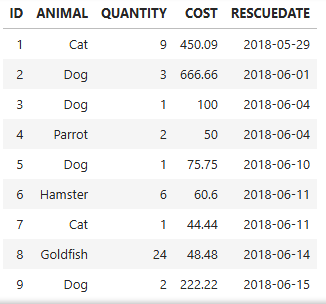

**Task**

1) Connect to SQLite database, create database instance, named "MY_DATABASE.db". Import PETRESCUE.sql into MY_DATABASE.db, and verify if it exists
2) Write a query that displays the average cost of rescuing a single dog. Note that the cost per dog would not be the same in different instances
3) Write a query that displays the animal name in each rescue in uppercase without duplications
4) Write a query that displays all the columns from the PETRESCUE table where the animal(s) rescued are 'cats'
5) Write a query that displays the number of rescues in the 6th month

In [1]:
# !pip install ipython-sql

In [13]:
import pandas as pd
import sqlite3
%load_ext sql
# Connectin to the SQLite database
%sql sqlite:///MY_DATABASE.db


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


1) Connecting to SQLite database, creating database instance. Importing PETRESCUE.sql into MY_DATABASE.db, and verifying if it exists

In [3]:
# Creating a connection to the SQLite database
con = sqlite3.connect('MY_DATABASE.db')
# Step 2: Create a cursor object using the connection
cursor = con.cursor()

In [4]:
# Reading the .sql file
with open('PETRESCUE-CREATE.sql', 'r') as sql_file:
    sql_script = sql_file.read()

In [5]:
# Executing the SQL script
cursor.executescript(sql_script)

In [6]:
# Verifying the existence of the table by running: 
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('PETRESCUE',)]


In [7]:
# Closing the connection
con.close()

In [8]:
%%sql 
SELECT * FROM PETRESCUE

 * sqlite:///MY_DATABASE.db
Done.


ID,ANIMAL,QUANTITY,COST,RESCUEDATE
1,Cat,9,450.09,2018-05-29
2,Dog,3,666.66,2018-06-01
3,Dog,1,100,2018-06-04
4,Parrot,2,50,2018-06-04
5,Dog,1,75.75,2018-06-10
6,Hamster,6,60.6,2018-06-11
7,Cat,1,44.44,2018-06-11
8,Goldfish,24,48.48,2018-06-14
9,Dog,2,222.22,2018-06-15


2. Write a query that displays the average cost of rescuing a single dog. Note that the cost per dog would not be the same in different instances.

In [9]:
%sql SELECT AVG(COST/QUANTITY) FROM PETRESCUE WHERE ANIMAL = 'Dog';

 * sqlite:///MY_DATABASE.db
Done.


AVG(COST/QUANTITY)
127.27


3. Write a query that displays the animal name in each rescue in uppercase without duplications.

In [10]:
%sql SELECT DISTINCT UPPER(ANIMAL) FROM PETRESCUE;

 * sqlite:///MY_DATABASE.db
Done.


UPPER(ANIMAL)
CAT
DOG
PARROT
HAMSTER
GOLDFISH


4. Write a query that displays all the columns from the PETRESCUE table where the animal(s) rescued are cats. Use cat in lowercase in the query

In [11]:
%sql SELECT * FROM PETRESCUE WHERE LOWER(ANIMAL) = 'cat';

 * sqlite:///MY_DATABASE.db
Done.


ID,ANIMAL,QUANTITY,COST,RESCUEDATE
1,Cat,9,450.09,2018-05-29
7,Cat,1,44.44,2018-06-11


5. Write a query that displays the number of rescues in the 6th month.

In [12]:
%sql SELECT COUNT(RESCUEDATE) AS NO_OF_RESCUE FROM PETRESCUE WHERE strftime('%m', RESCUEDATE) = '06';

 * sqlite:///MY_DATABASE.db
Done.


NO_OF_RESCUE
8
